# Análisis del Rendimiento de Estudiantes

## Introducción

Este proyecto se centra en analizar el rendimiento de estudiantes en tres áreas clave: matemáticas, lectura y escritura, utilizando el dataset 'Students Performance'. El objetivo es explorar cómo diversas características demográficas y socioeconómicas, como el género, el grupo étnico y el nivel educativo de los padres, influyen en el rendimiento académico de los estudiantes.

A través de este análisis, buscamos identificar patrones significativos y factores predictivos que puedan ayudar en la formulación de estrategias para mejorar el rendimiento estudiantil. Las principales tareas incluirán la exploración de datos, visualización, manejo de datos faltantes, análisis estadístico y modelado predictivo para estimar el rendimiento en matemáticas.

Este análisis no solo aportará insights valiosos sobre la educación sino que también demostrará cómo técnicas avanzadas de análisis de datos pueden aplicarse en contextos educativos para obtener conclusiones prácticas y útiles.


## Carga de Datos
A continuación, cargamos el dataset utilizando la librería Pandas. Contiene las siguientes columnas de interés:
- `gender`: Género del estudiante.
- `race/ethnicity`: Grupo étnico del estudiante.
- `parental level of education`: Nivel educativo de los padres.
- `lunch`: Tipo de almuerzo.
- `test preparation course`: Si el estudiante tomó o no un curso de preparación.
- `math score`, `reading score`, `writing score`: Puntuaciones en las pruebas de matemáticas, lectura y escritura.


In [22]:
import pandas as pd

# Load the data
data_path = '../data/StudentsPerformance.csv'
df = pd.read_csv(data_path)

# Show the first rows of the dataframe using the head method
df.head()


gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [23]:
# General information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [24]:
# Summary statistics for the numerical columns
df.describe()

math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

In [25]:
# Check for missing values
df.isnull().sum()

#check for missing values and handle them if any
if df.isnull().sum().any():
    # fill missing values with the mean when the column is numerical and with the mode when the column is categorical
    df.fillna({
        'math score': df['math score'].mean(),
        'reading score': df['reading score'].mean(),
        'writing score': df['writing score'].mean(),
        'gender': df['gender'].mode()[0],
        'race/ethnicity': df['race/ethnicity'].mode()[0],
        'parental level of education': df['parental level of education'].mode()[0],
        'lunch': df['lunch'].mode()[0],
        'test preparation course': df['test preparation course'].mode()[0]
    }, inplace=True)
else:
    print('No missing values found')


No missing values found


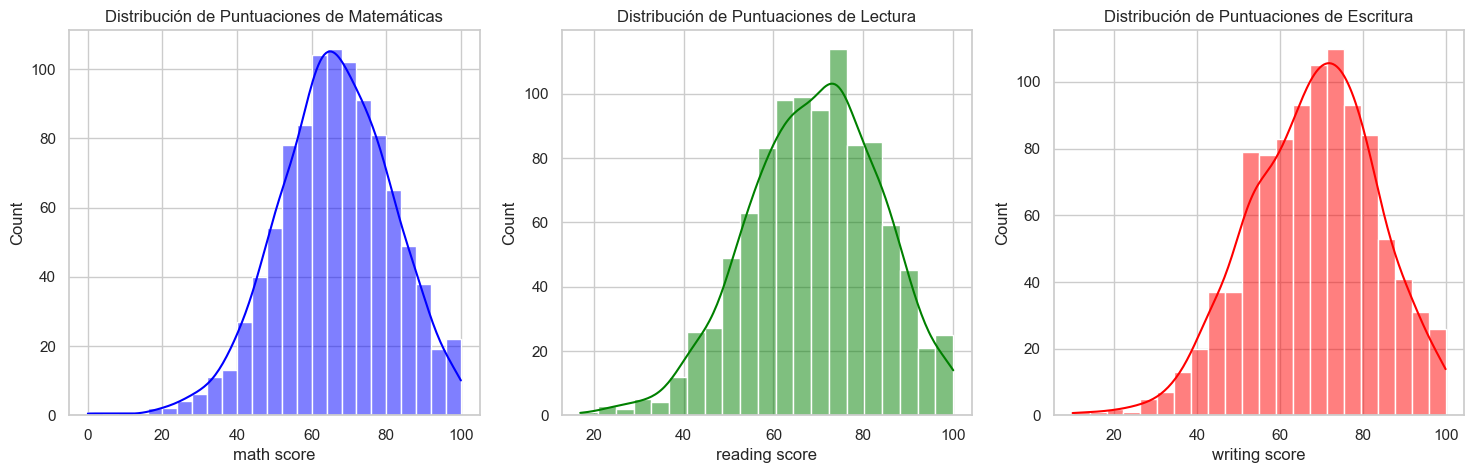

In [26]:
## Histogramas de las puntuaciones
''' 
Utilizamos histogramas para visualizar la distribución de las puntuaciones en matemáticas, lectura y escritura. 
Estos gráficos nos permiten observar la forma de la distribución y detectar si existen patrones como asimetría o presencia de picos.

'''

import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style of seaborn
sns.set(style="whitegrid")

# Creating the histogram plots for the math, reading, and writing scores
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['math score'], kde=True, color='blue')
plt.title('Distribución de Puntuaciones de Matemáticas')

plt.subplot(1, 3, 2)
sns.histplot(df['reading score'], kde=True, color='green')
plt.title('Distribución de Puntuaciones de Lectura')

plt.subplot(1, 3, 3)
sns.histplot(df['writing score'], kde=True, color='red')
plt.title('Distribución de Puntuaciones de Escritura')

plt.show()


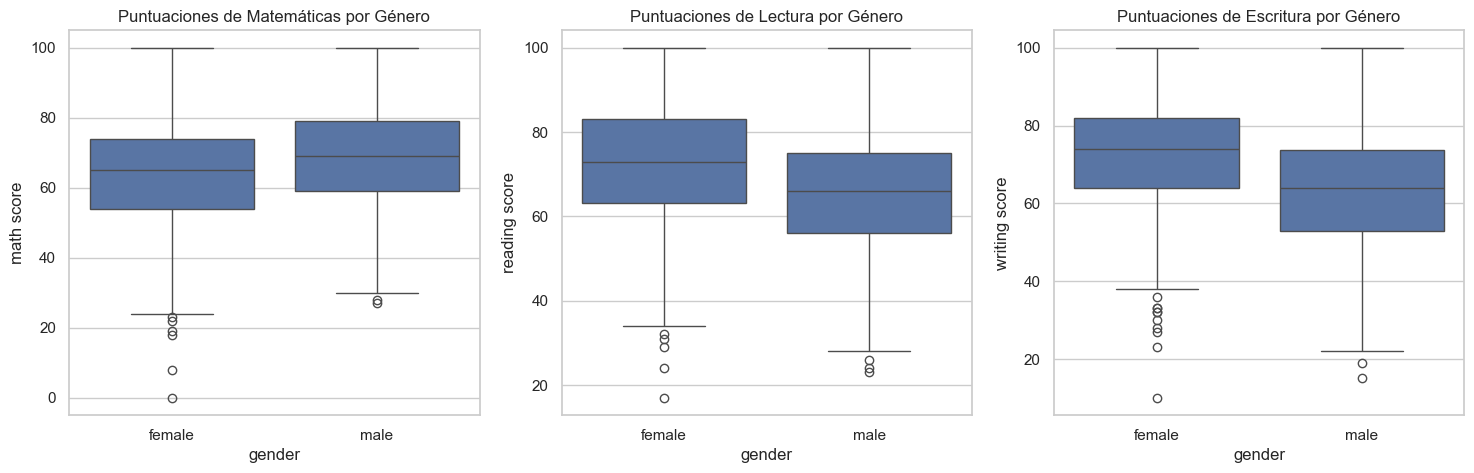

In [27]:
## Gráficos de Caja por Género

'''
Los gráficos de caja proporcionan una forma visual de comparar la distribución de las puntuaciones entre diferentes grupos de género, destacando diferencias en medianas, rangos intercuartílicos y la presencia de valores atípicos.
'''

# Graphs of box plots to compare performance by gender
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='gender', y='math score', data=df)
plt.title('Puntuaciones de Matemáticas por Género')

plt.subplot(1, 3, 2)
sns.boxplot(x='gender', y='reading score', data=df)
plt.title('Puntuaciones de Lectura por Género')

plt.subplot(1, 3, 3)
sns.boxplot(x='gender', y='writing score', data=df)
plt.title('Puntuaciones de Escritura por Género')

plt.show()


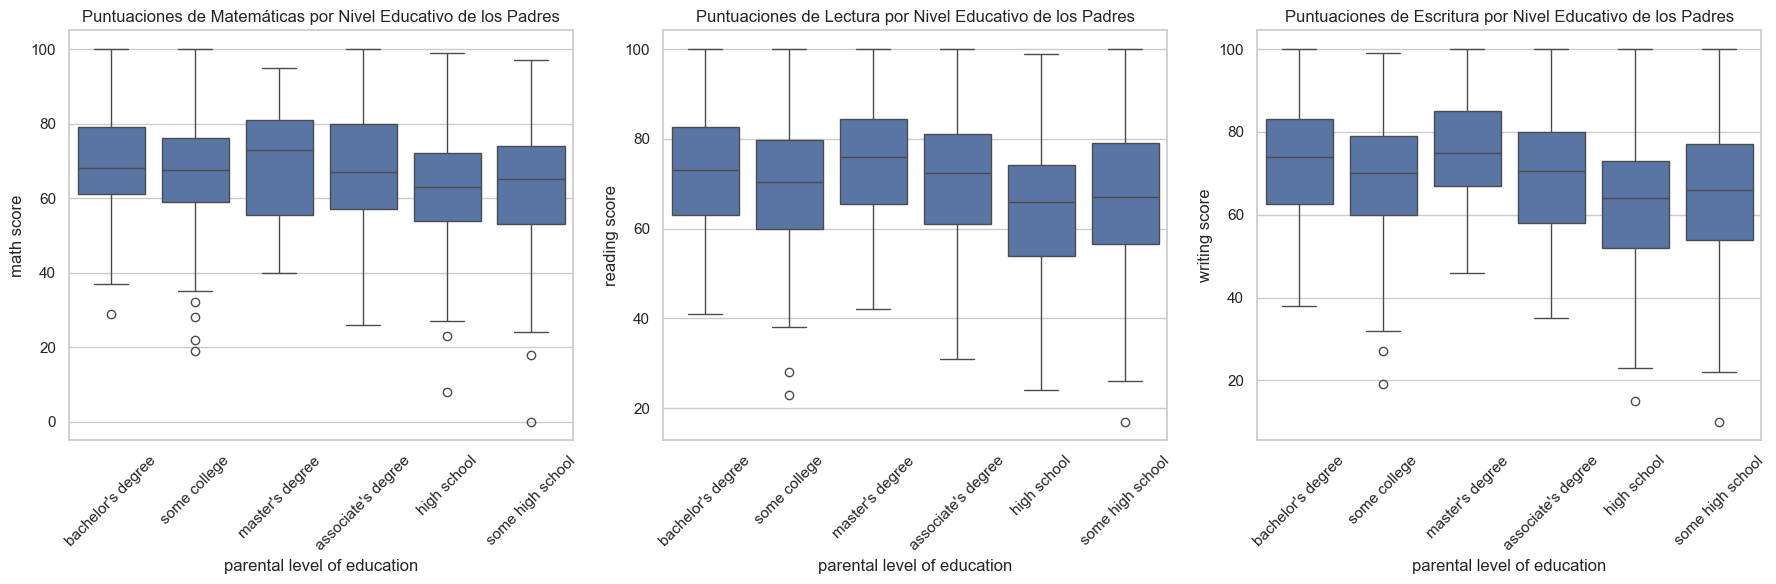

In [28]:
# Gráfico de caja del nivel educativo de los padres y las puntuaciones en todas las materias
subjects = ['math score', 'reading score', 'writing score']
titles = ['Matemáticas', 'Lectura', 'Escritura']

plt.figure(figsize=(18, 6))
for i, (score, title) in enumerate(zip(subjects, titles), 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='parental level of education', y=score, data=df)
    plt.xticks(rotation=45)
    plt.title(f'Puntuaciones de {title} por Nivel Educativo de los Padres')

plt.tight_layout()
plt.show()


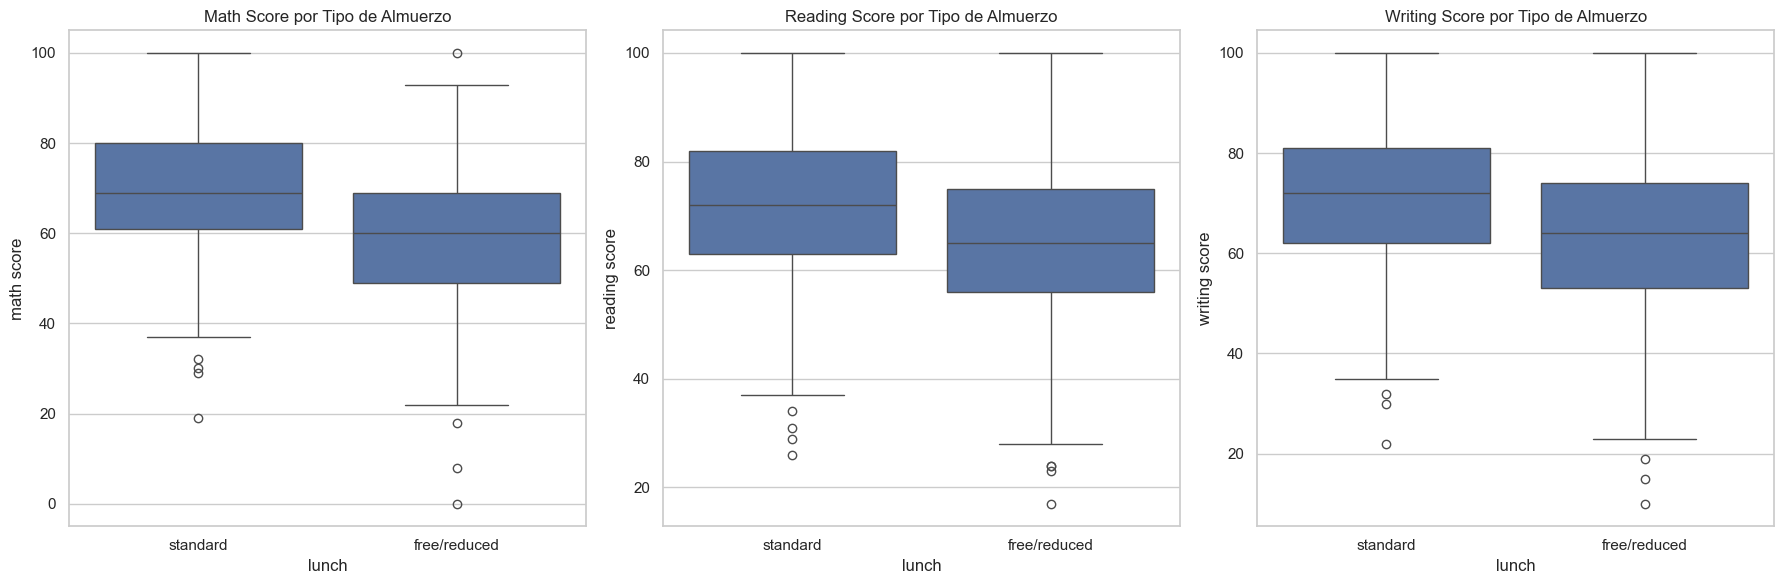

In [29]:
# Gráfico de caja de la relación entre el almuerzo y las puntuaciones en todas las materias
plt.figure(figsize=(18, 6))
for i, score in enumerate(subjects, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='lunch', y=score, data=df)
    plt.title(f'{score.title()} por Tipo de Almuerzo')

plt.tight_layout()
plt.show()


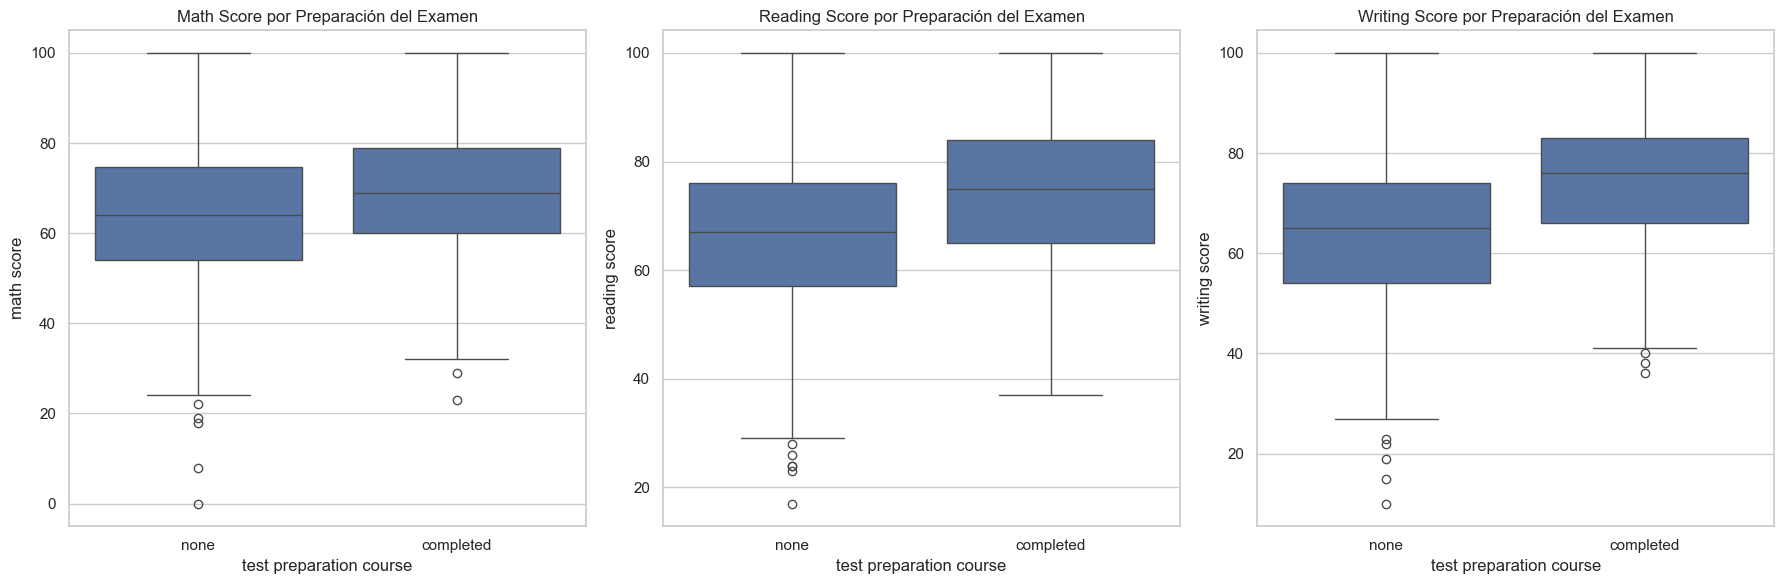

In [30]:
# Gráfico de caja de la relación entre la preparación del examen y las puntuaciones en todas las materias
plt.figure(figsize=(18, 6))
for i, score in enumerate(subjects, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='test preparation course', y=score, data=df)
    plt.title(f'{score.title()} por Preparación del Examen')

plt.tight_layout()
plt.show()


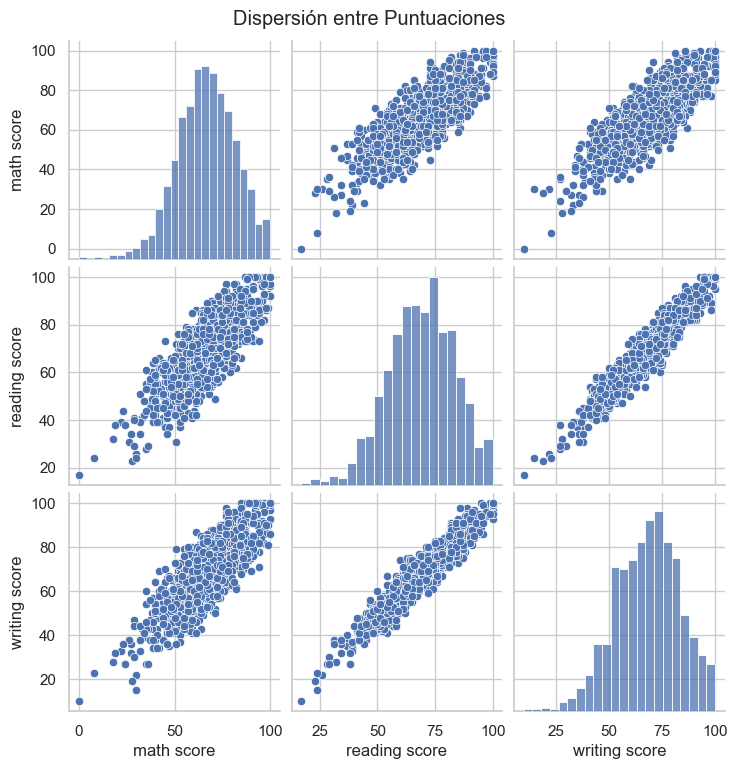

In [31]:
## Gráficos de Dispersión entre Puntuaciones
'''
Utilizamos gráficos de dispersión para evaluar la relación entre las diferentes puntuaciones académicas. Estos gráficos ayudan a identificar correlaciones potenciales entre las puntuaciones en matemáticas, lectura y escritura.

'''
# Gráficos de dispersión entre las puntuaciones
sns.pairplot(df[['math score', 'reading score', 'writing score']])
plt.suptitle('Dispersión entre Puntuaciones', y=1.02)
plt.show()


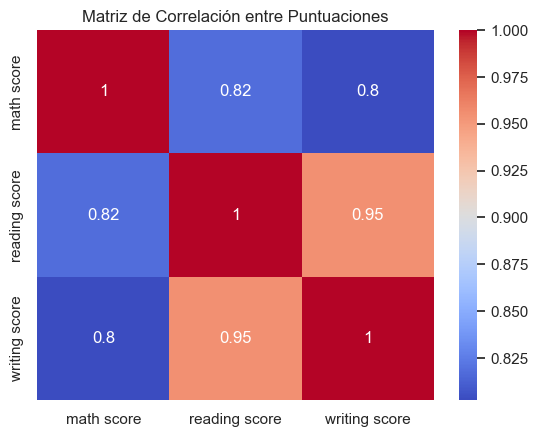

In [32]:
# Correlaciones entre las puntuaciones
correlation_matrix = df[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación entre Puntuaciones')
plt.show()

In [33]:
# Codification of categorical variables and division data
from sklearn.model_selection import train_test_split, cross_val_score

df_encoded = pd.get_dummies(df, columns=['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'])

X = df_encoded.drop(['math score', 'reading score', 'writing score'], axis=1)  # Delete other scores to focus on math score
y = df_encoded['math score']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Cross-validation
scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Cross-validation Mean Squared Error: {scores.mean() * -1}')

# Feature importance
importance = model.coef_
feature_names = X.columns

feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': importance
})

feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance)




Mean Squared Error: 206.7675
Cross-validation Mean Squared Error: 177.81112499999998
                                           feature    importance
15               test preparation course_completed  1.264940e+15
16                    test preparation course_none  1.264940e+15
6                           race/ethnicity_group E  9.731116e+14
5                           race/ethnicity_group D  9.731116e+14
2                           race/ethnicity_group A  9.731116e+14
4                           race/ethnicity_group C  9.731116e+14
3                           race/ethnicity_group B  9.731116e+14
8    parental level of education_bachelor's degree  9.265794e+14
10     parental level of education_master's degree  9.265794e+14
11        parental level of education_some college  9.265794e+14
7   parental level of education_associate's degree  9.265794e+14
12    parental level of education_some high school  9.265794e+14
9          parental level of education_high school  9.265794e+14
1    

In [35]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Standardize the data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)
x_train_scaled, x_test_scaled = scaler.transform(X_train), scaler.transform(X_test)

# Different values of alpha
alpha_options = [0.001, 0.01, 0.1, 1, 10, 100]

In [36]:
# Ridge  Model
from sklearn.linear_model import Ridge

best_score = np.inf
best_alpha = {}

for alpha in alpha_options:
    model = Ridge(alpha=alpha, random_state=42, max_iter=10000)
    model.fit(x_train_scaled, y_train)
    scores = cross_val_score(model, x_scaled, y, cv=5, scoring='neg_mean_squared_error')
    mean_mse = -scores.mean()
    if mean_mse < best_score:
        best_score = mean_mse
        best_alpha = {'alpha': alpha}
    print(f"Alpha: {alpha}, Mean Squared Error: {mean_mse:.2f}")

print(f"\n\nBest Alpha: {best_alpha['alpha']}, Best Mean Squared Error: {best_score:.2f}")



Alpha: 0.001, Mean Squared Error: 176.42
Alpha: 0.01, Mean Squared Error: 176.42
Alpha: 0.1, Mean Squared Error: 176.42
Alpha: 1, Mean Squared Error: 176.42
Alpha: 10, Mean Squared Error: 176.38
Alpha: 100, Mean Squared Error: 176.25


Best Alpha: 100, Best Mean Squared Error: 176.25


In [37]:
# Lasso  Model
from sklearn.linear_model import Lasso

best_score = np.inf
best_alpha = {}

for alpha in alpha_options:
    model = Lasso(alpha=alpha, random_state=42, max_iter=10000)
    model.fit(x_train_scaled, y_train)
    scores = cross_val_score(model, x_scaled, y, cv=5, scoring='neg_mean_squared_error')
    mean_mse = -scores.mean()
    if mean_mse < best_score:
        best_score = mean_mse
        best_alpha = {'alpha': alpha}
    print(f"Alpha: {alpha}, Mean Squared Error: {mean_mse:.2f}")

print(f"\n\nBest Alpha: {best_alpha['alpha']}, Best Mean Squared Error: {best_score:.2f}")

Alpha: 0.001, Mean Squared Error: 176.42
Alpha: 0.01, Mean Squared Error: 176.40
Alpha: 0.1, Mean Squared Error: 176.36
Alpha: 1, Mean Squared Error: 184.05
Alpha: 10, Mean Squared Error: 230.17
Alpha: 100, Mean Squared Error: 230.17


Best Alpha: 0.1, Best Mean Squared Error: 176.36


In [38]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor


# List of different settings for testing
n_estimators_options = [100, 200, 300]
max_features_options = ['sqrt', 'log2', None]
max_depth_options = [10, 15, 20, None]

best_score = np.inf

# Test all the combinations
for n_estimators in n_estimators_options:
    for max_features in max_features_options:
        for max_depth in max_depth_options:
            model = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, random_state=42)
            model.fit(X_train, y_train)
            scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
            mean_mse = -scores.mean()

            print(f"Random Forest with n_estimators={n_estimators}, max_features={max_features}, max_depth={max_depth}: MSE={mean_mse:.2f}")

            # Guardar el mejor modelo
            if mean_mse < best_score:
                best_score = mean_mse
                best_params = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth}

print(f"Best MSE: {best_score:.2f} with parameters: {best_params}")

Random Forest with n_estimators=100, max_features=sqrt, max_depth=10: MSE=216.37
Random Forest with n_estimators=100, max_features=sqrt, max_depth=15: MSE=224.53
Random Forest with n_estimators=100, max_features=sqrt, max_depth=20: MSE=224.53
Random Forest with n_estimators=100, max_features=sqrt, max_depth=None: MSE=224.53
Random Forest with n_estimators=100, max_features=log2, max_depth=10: MSE=216.37
Random Forest with n_estimators=100, max_features=log2, max_depth=15: MSE=224.53
Random Forest with n_estimators=100, max_features=log2, max_depth=20: MSE=224.53
Random Forest with n_estimators=100, max_features=log2, max_depth=None: MSE=224.53
Random Forest with n_estimators=100, max_features=None, max_depth=10: MSE=219.94
Random Forest with n_estimators=100, max_features=None, max_depth=15: MSE=225.27
Random Forest with n_estimators=100, max_features=None, max_depth=20: MSE=225.27
Random Forest with n_estimators=100, max_features=None, max_depth=None: MSE=225.27
Random Forest with n_e

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from itertools import combinations
import json

def test_feature_combinations(df, target, max_features=3):
    features = [col for col in df.columns if col != target]
    results = []

        # Create file to store the results 
    filename = f"../Results/linear_regression_results_{max_features}_features.json"
    
    # Probar todas las combinaciones de características
    for r in range(1, max_features + 1):
        for subset in combinations(features, r):
            X = df[list(subset)]
            y = df[target]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
            # Entrenar el modelo de regresión lineal
            model = LinearRegression()
            model.fit(X_train, y_train)
            predictions = model.predict(X_test)
            mse = mean_squared_error(y_test, predictions)
            
            # Almacenar el subset, MSE, y una muestra de los valores reales vs. predichos
            results.append({
                'features': subset,
                'mse': mse,
                'sample_comparison': {
                    'actual': y_test[:5].tolist(),
                    'predicted': predictions[:5].tolist()
                }
            })

    # Ordenar los resultados por MSE
    results.sort(key=lambda x: x['mse'])

    # invert the order to have the best MSE first
    results = results[:100][::-1]
    
    # # Mostrar solo las mejores 100 combinaciones
    # for result in results:
    #     print(f"Features: {result['features']}")
    #     print(f"MSE: {result['mse']}")
    #     print(f"Sample Comparison:\n{result['sample_comparison']}\n")

    # save the results to a file
    with open(filename, 'w') as file:
        json.dump(results, file, indent=4)

# Ejemplo de uso
test_feature_combinations(df_encoded, 'math score', max_features=1)
test_feature_combinations(df_encoded, 'math score', max_features=3)
test_feature_combinations(df_encoded, 'math score', max_features=5)


In [47]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from itertools import combinations
import numpy as np

def test_ridge_combinations(df, target, max_features=3, alpha_options=[0.001, 0.01, 0.1, 1, 10, 100]):
    features = [col for col in df.columns if col != target]
    results = []
    scaler = StandardScaler()

    # Create file to store the results 
    filename = f"../Results/ridge_results_max_features_{max_features}.json"

    
    # Probar todas las combinaciones de características
    for r in range(1, max_features + 1):
        for subset in combinations(features, r):
            X = df[list(subset)]
            y = df[target]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
            
            # Escalar los datos
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)
            
            # Evaluar diferentes alphas
            for alpha in alpha_options:
                model = Ridge(alpha=alpha, max_iter=10000)
                model.fit(X_train_scaled, y_train)
                predictions = model.predict(X_test_scaled)
                mse = mean_squared_error(y_test, predictions)
                scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
                mean_cv_mse = -np.mean(scores)
                
                # Almacenar los resultados
                results.append({
                    'features': subset,
                    'alpha': alpha,
                    'mse': mse,
                    'mean_cv_mse': mean_cv_mse,
                    'sample_comparison': {
                        'actual': y_test[:5].tolist(),
                        'predicted': predictions[:5].tolist()
                    }
                })

    
    # Ordenar los resultados por MSE de validación cruzada
    results.sort(key=lambda x: x['mean_cv_mse'])

    results = results[:100][::-1]

    # Write the results to the file
    with open(filename, 'w') as file:
        json.dump(results, file, indent=4)

test_ridge_combinations(df_encoded, 'math score', max_features=2, alpha_options=[0.001, 0.01, 0.1, 1, 10, 100])
test_ridge_combinations(df_encoded, 'math score', max_features=3, alpha_options=[0.001, 0.01, 0.1, 1, 10, 100])
test_ridge_combinations(df_encoded, 'math score', max_features=5, alpha_options=[0.001, 0.01, 0.1, 1, 10, 100])


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from itertools import combinations
import numpy as np

def test_random_forest_combinations(df, target, max_features_comb=3):
    features = [col for col in df.columns if col != target]
    results = []
    scaler = StandardScaler()

    # Crear archivo para almacenar los resultados
    filename = f"../Results/random_forest_results_max_features_{max_features_comb}.json"

    # Opciones de configuración del Random Forest
    n_estimators_options = [100, 200]
    max_features_options = ['sqrt', 'log2', None]
    max_depth_options = [10, 15, None]

    # Probar todas las combinaciones de características
    for r in range(1, max_features_comb + 1):
        for subset in combinations(features, r):
            X = df[list(subset)]
            y = df[target]
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

            # Escalar los datos
            X_train_scaled = scaler.fit_transform(X_train)
            X_test_scaled = scaler.transform(X_test)

            # Evaluar diferentes configuraciones del Random Forest
            for n_estimators in n_estimators_options:
                for max_features in max_features_options:
                    for max_depth in max_depth_options:
                        model = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features, max_depth=max_depth, random_state=42)
                        model.fit(X_train_scaled, y_train)
                        predictions = model.predict(X_test_scaled)
                        mse = mean_squared_error(y_test, predictions)
                        scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
                        mean_cv_mse = -np.mean(scores)

                        # Almacenar los resultados
                        results.append({
                            'features': subset,
                            'n_estimators': n_estimators,
                            'max_features': max_features,
                            'max_depth': max_depth,
                            'mse': mse,
                            'mean_cv_mse': mean_cv_mse,
                            'sample_comparison': {
                                'actual': y_test[:5].tolist(),
                                'predicted': predictions[:5].tolist()
                            }
                        })

    # Ordenar los resultados por MSE de validación cruzada
    results.sort(key=lambda x: x['mean_cv_mse'])

    results = results[:100][::-1]

    # Escribir los resultados en el archivo y mostrar los 20 mejores
    with open(filename, 'w') as file:
        json.dump(results, file, indent=4)

# Ejemplo de uso
test_random_forest_combinations(df_encoded, 'math score', max_features_comb=2)
test_random_forest_combinations(df_encoded, 'math score', max_features_comb=3)
